Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) icludes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import the dataset
df1 = pd.read_csv('HR_Employee_Attrition_Data1.csv')

In [3]:
df1.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,0,1,6,4,0,5,2,8
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,3,3,10,7,1,7,2,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,3,3,0,0,0,0,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,3,3,8,7,3,0,1,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,3,3,2,2,2,2,1,6
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,0,2,2,7,7,3,6,1,8
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,1,3,3,2,1,0,0,0,1,12
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,2,1,2,3,1,0,0,0,1,1
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,2,0,2,3,9,7,1,8,3,10
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,2,2,3,2,7,7,7,7,2,17


In [4]:
df1.shape

(2940, 31)

In [5]:
df1.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobRole                   2940 non-null   object
 13  JobSatisfaction           2940 non-null   int64 
 14  MaritalStatus           

In [6]:
df1.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df1.isnull().values.sum()

0

In [9]:
df1.describe() # 5 Number Summary

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,...,2.712245,0.793878,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2.063946,11.279592
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.102658,4707.155770,7116.575021,...,1.081025,0.851932,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529,1.106752,7.779458
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8045.000000,...,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,6.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,...,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000,10.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,4.000000,8380.000000,20462.000000,...,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000,15.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,...,4.000000,3.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,5.000000,40.000000


In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.0,3.0,4.0,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.0,3.0,3.0,4.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
#print the features with unique values
for column in df1.columns:
    if df1[column].dtype == object:
        print(str(column) + ' : ' + str(df1[column].unique()))
        print(df1[column].value_counts())
        print('------------------------------------------------------------------------------')

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
------------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
-------------------------

In [12]:
# # #We can drop columns/features of no important or relavent
#  df1['EmployeeCount'].nunique()

In [13]:
# df1['EmployeeNumber'].nunique()

In [14]:
# df1['Over18'].nunique()

In [15]:
# df1['StandardHours'].nunique()

In [16]:
# df1 = df1.drop(columns=['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], axis= 1)

In [17]:
# # Drop duplicates
df1.drop_duplicates(inplace=True)

# # Save the cleaned dataset to a new CSV file
df1.to_csv('cleaned_dataset_Attrition1.csv', index=False)

In [18]:
#import the dataset
df = pd.read_csv('cleaned_dataset_Attrition1.csv')

In [19]:
df.shape

(1470, 31)

In [20]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,0,1,6,4,0,5,2,8
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,3,3,10,7,1,7,2,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,3,3,0,0,0,0,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,3,3,8,7,3,0,1,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,3,3,2,2,2,2,1,6
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,0,2,2,7,7,3,6,1,8
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,1,3,3,2,1,0,0,0,1,12
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,2,1,2,3,1,0,0,0,1,1
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,2,0,2,3,9,7,1,8,3,10
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,2,2,3,2,7,7,7,7,2,17


In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,...,2.712245,0.793878,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2.063946,11.279592
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,7117.786044,...,1.081209,0.852077,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1.106940,7.780782
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8047.000000,...,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,6.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,...,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000,10.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,...,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000,15.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,...,4.000000,3.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,5.000000,40.000000


In [22]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [23]:
len(df.select_dtypes(include='object').columns)

8

In [24]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobLevel', 'TotalWorkingYears'],
      dtype='object')

In [25]:
len(df.select_dtypes(include='int64').columns)

23

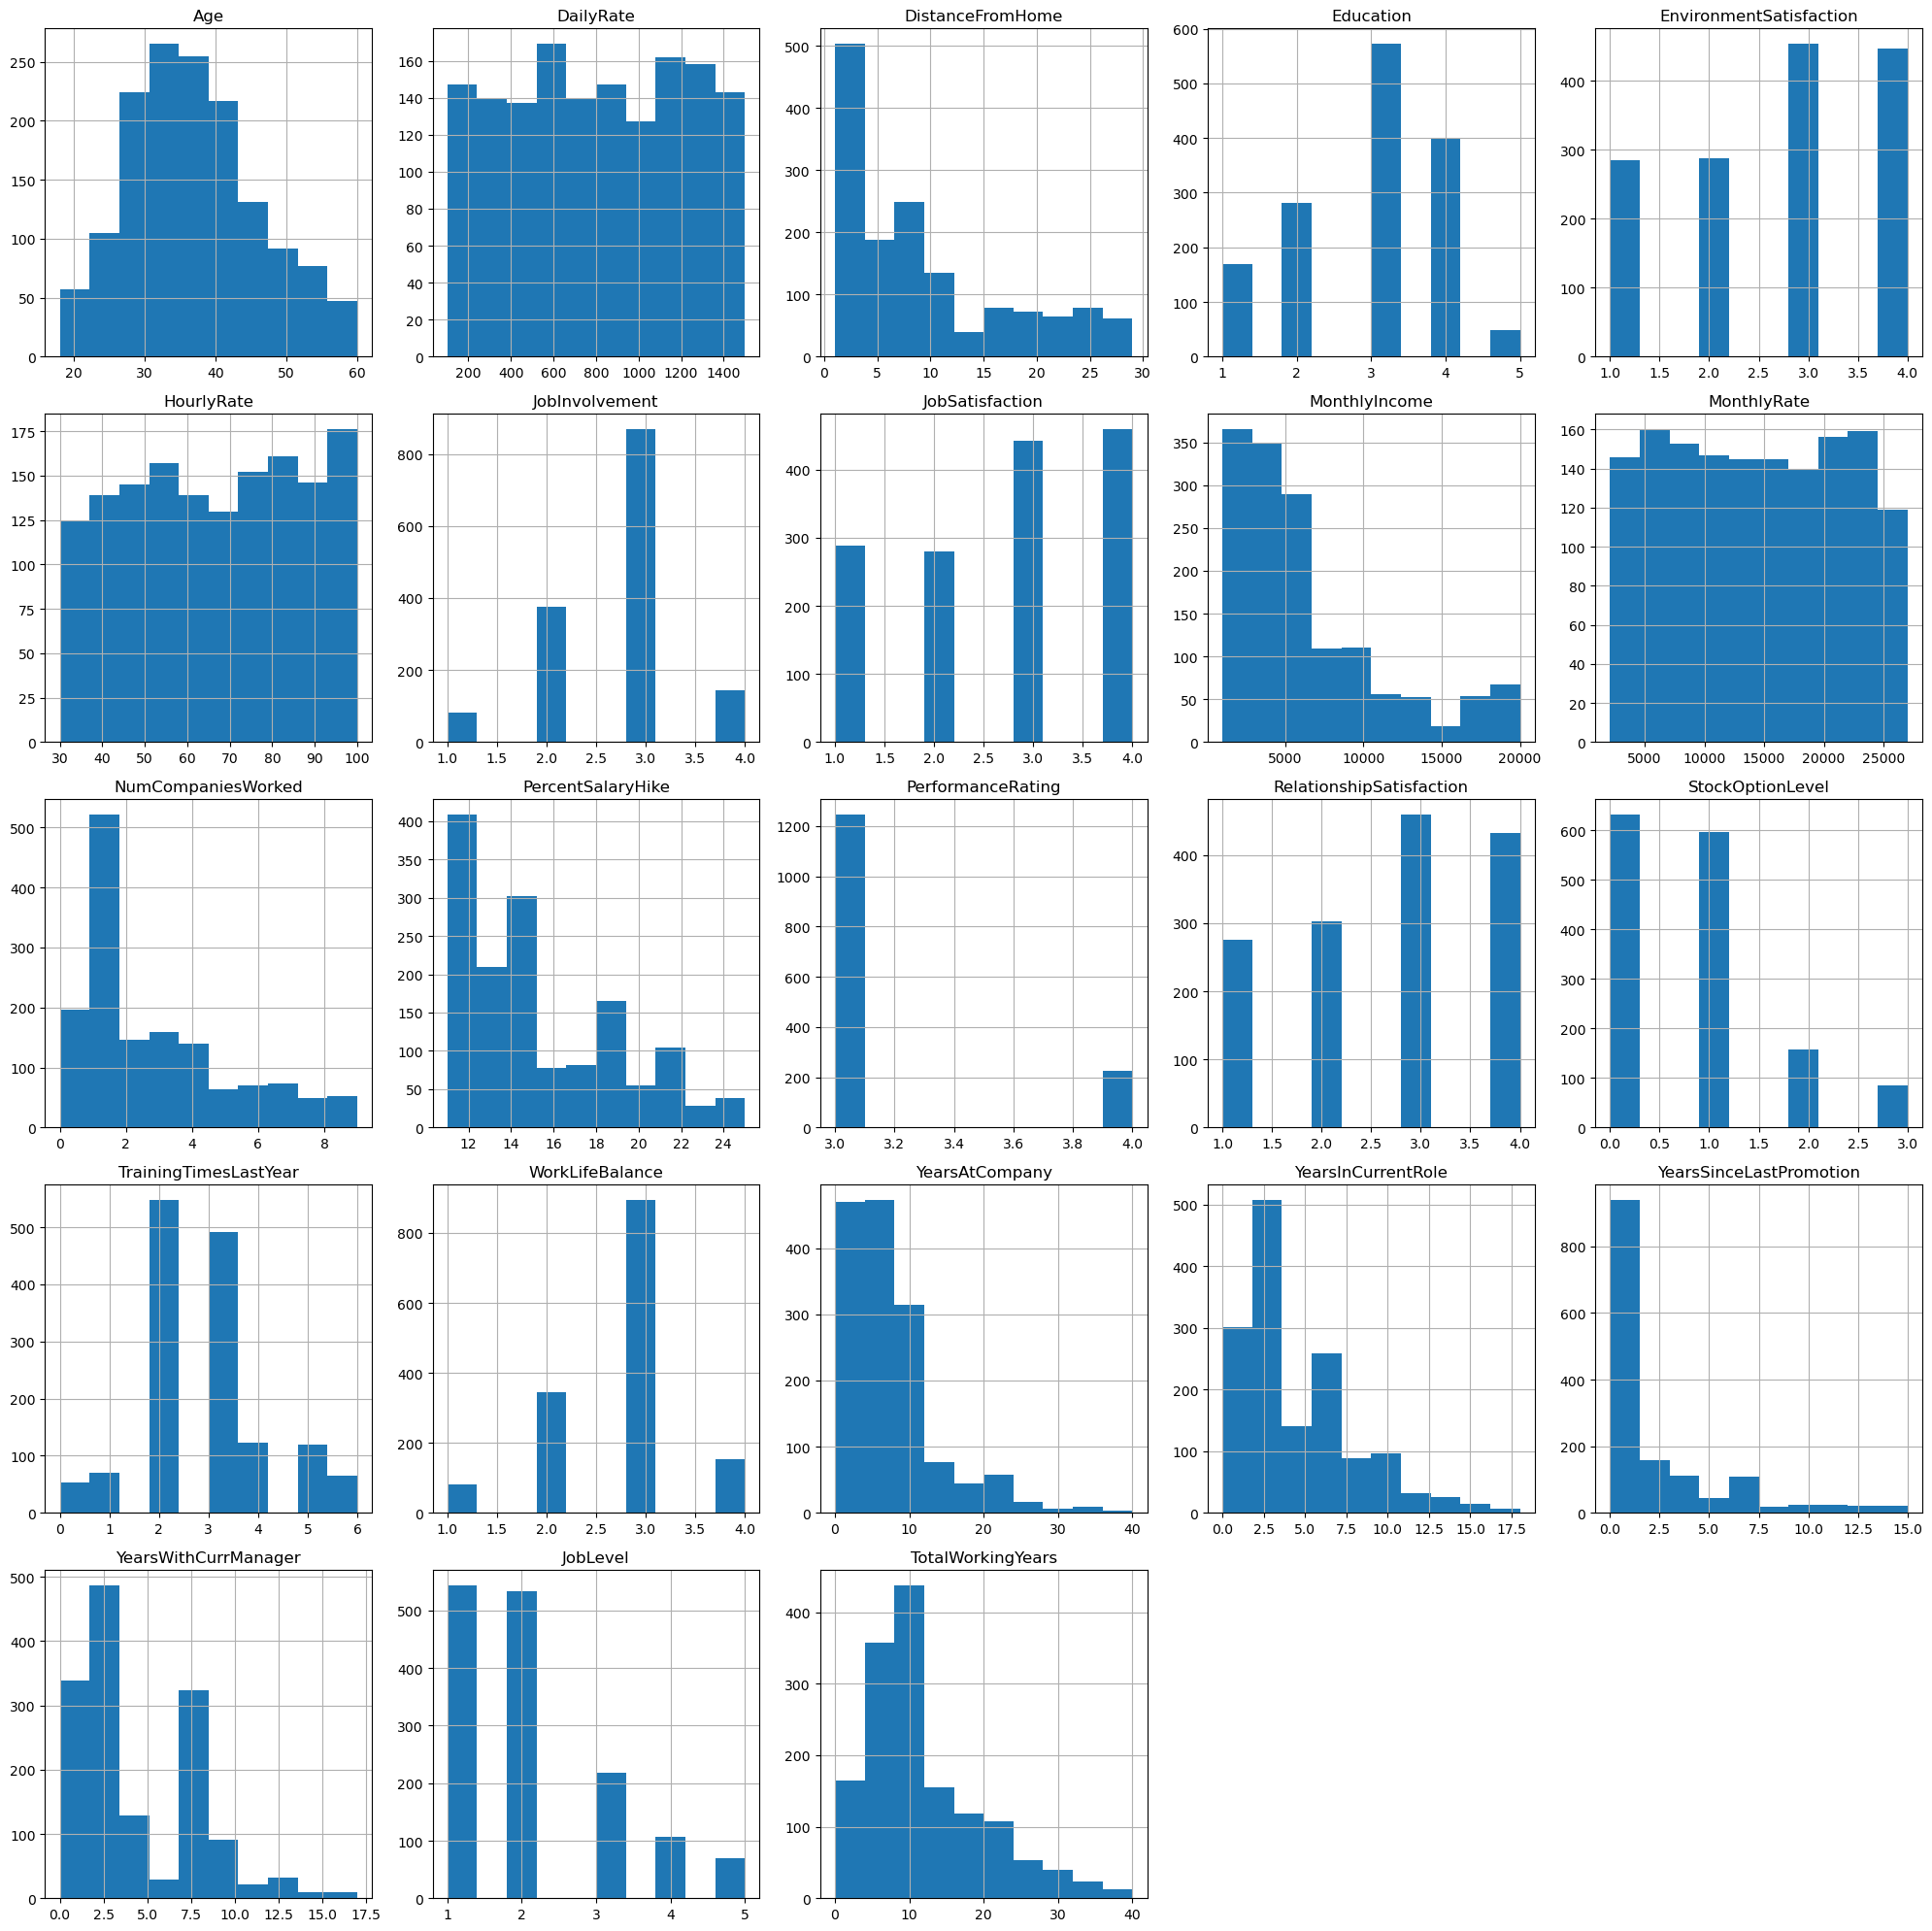

In [26]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

In [27]:
df.Age.skew(), df.DistanceFromHome.skew(), df.MonthlyIncome.skew(), df.NumCompaniesWorked.skew(),
df.PercentSalaryHike.skew(), df.TotalWorkingYears.skew(), df.YearsAtCompany.skew(), df.YearsInCurrentRole.skew()

(0.8211279755780908,
 1.1171718528128527,
 1.7645294543422085,
 0.9173631562908262)

In [28]:
df.Age.kurtosis(), df.DistanceFromHome.kurtosis(), df.MonthlyIncome.kurtosis(), df.NumCompaniesWorked.kurtosis(),
df.PercentSalaryHike.kurtosis(), df.TotalWorkingYears.kurtosis(), df.YearsAtCompany.kurtosis(), df.YearsInCurrentRole.kurtosis()

(-0.30059822209054543,
 0.918269536621358,
 3.93550875575465,
 0.47742077351356293)

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.



In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,0,1,6,4,0,5,2,8
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,3,3,10,7,1,7,2,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,3,3,0,0,0,0,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,3,3,8,7,3,0,1,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,3,3,2,2,2,2,1,6


In [30]:
df.shape #we have dropped 3 features so shape (2940,32)

(1470, 31)

In [31]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0


C:\Users\swara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


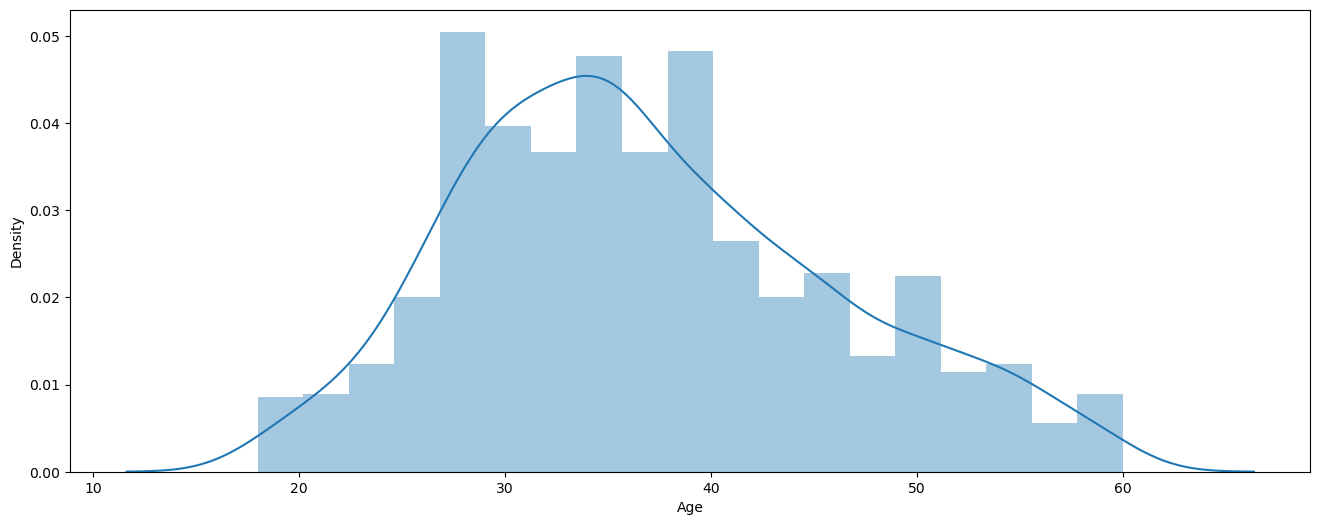

In [32]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(df['Age'])
plt.show()

C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


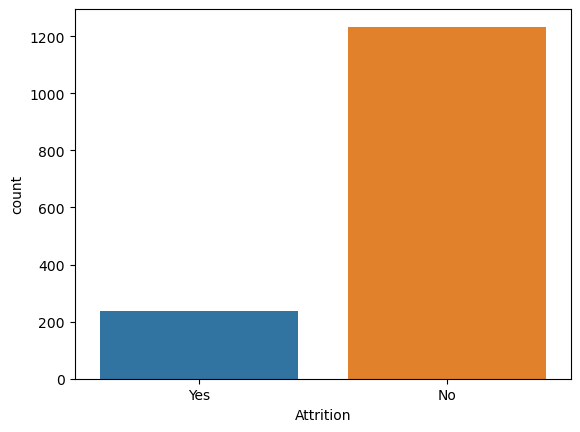

In [33]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [34]:
# Employees left the company
(df.Attrition == 'Yes').sum()

237

In [35]:
# Employees with the company
(df.Attrition == 'No').sum()

1233

In [36]:
#accuracy
(1233-237)/1233

0.8077858880778589

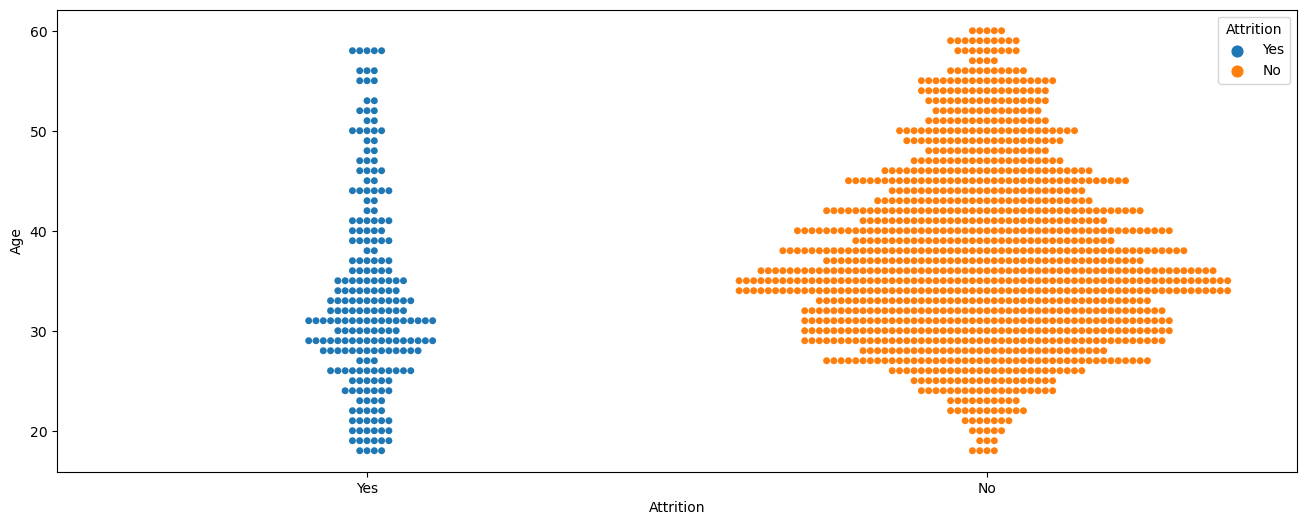

'"From the below plot we can see that there is NO linear relation between \'Age\' and \'Attrition\', \nbut bulk of the attrition is happening between the age groups of \'25-32\''

In [37]:
#Check to see if there is any relation b/w Age and Attrition
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Attrition', data = df, hue = 'Attrition')
plt.show()
""""From the below plot we can see that there is NO linear relation between 'Age' and 'Attrition', 
but bulk of the attrition is happening between the age groups of '25-32'"""

<AxesSubplot:xlabel='Age', ylabel='count'>

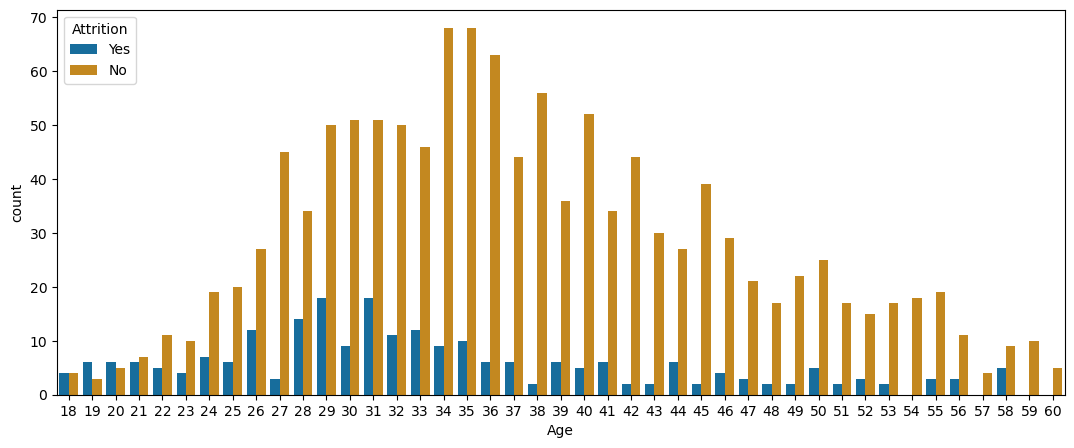

In [38]:
#No.employees that left and stayed by age
plt.subplots(figsize =(13,5))
sns.countplot(x='Age', hue='Attrition', data =df, palette ='colorblind')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


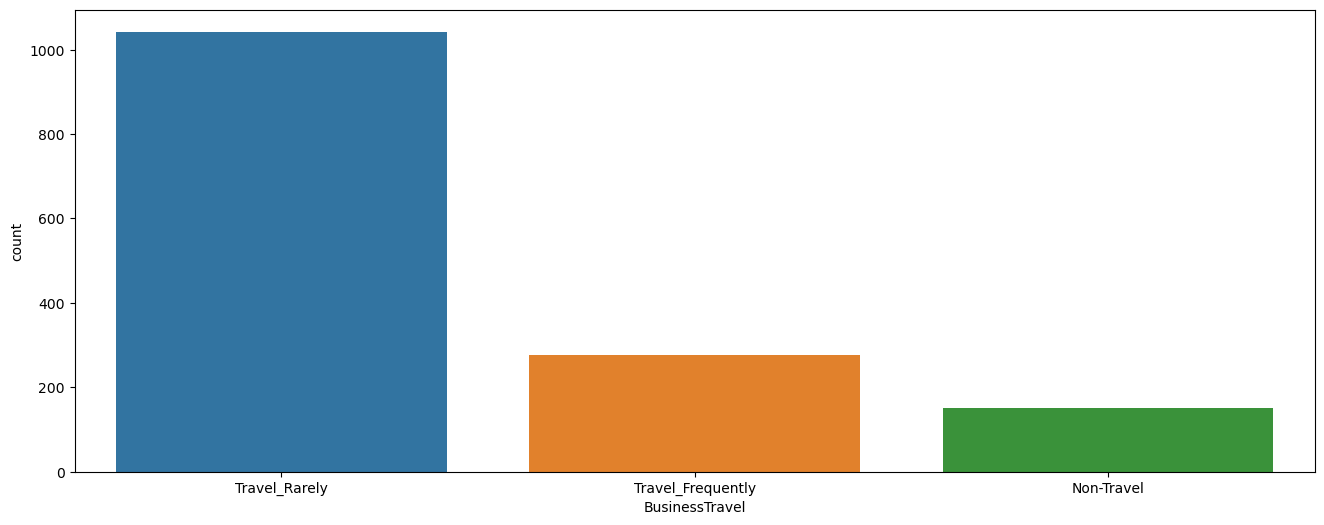

In [39]:
#Plotting the count by business travel
plt.figure(figsize = (16,6))
print(df['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel', data = df)
plt.show()

In [40]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
df.loc[df['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
df.loc[df['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
df.loc[df['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,0,1,6,4,0,5,2,8,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,3,3,10,7,1,7,2,10,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,3,3,0,0,0,0,1,7,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,3,3,8,7,3,0,1,8,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,3,3,2,2,2,2,1,6,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,0,2,2,7,7,3,6,1,8,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,3,3,2,1,0,0,0,1,12,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,1,2,3,1,0,0,0,1,1,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,0,2,3,9,7,1,8,3,10,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,2,3,2,7,7,7,7,2,17,1.0


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


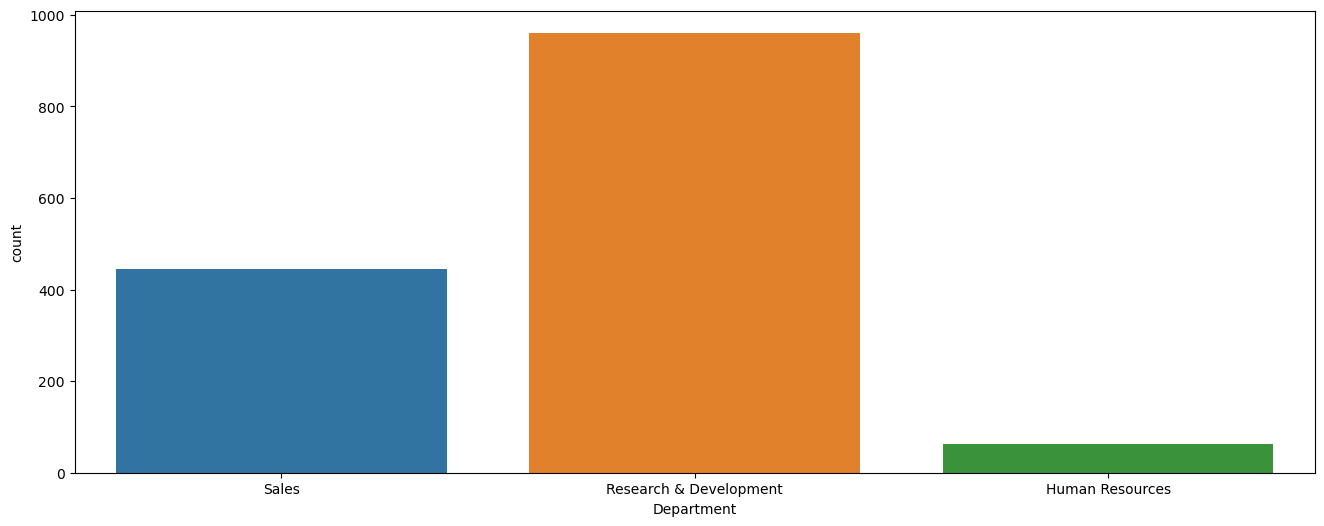

In [41]:
#Plotting counts for department
print(df['Department'].value_counts())
plt.figure(figsize = (16,6))
sns.countplot(df['Department'])
plt.show()

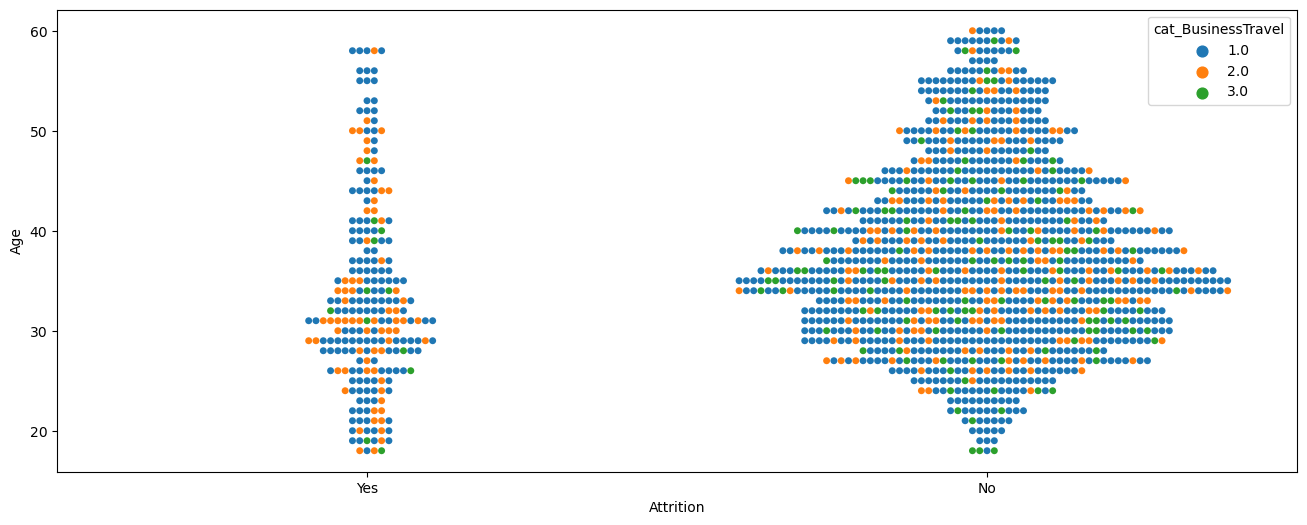

'From the below plot we can see that attrition is higher for employees in age bracket of [25-32].\nAlso, in this age group employees are travelling more'

In [42]:
#Plotting Attrition for Age and business travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y='Age',  data = df, hue = 'cat_BusinessTravel')
plt.show()

#Insight 1
"""From the below plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more"""

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


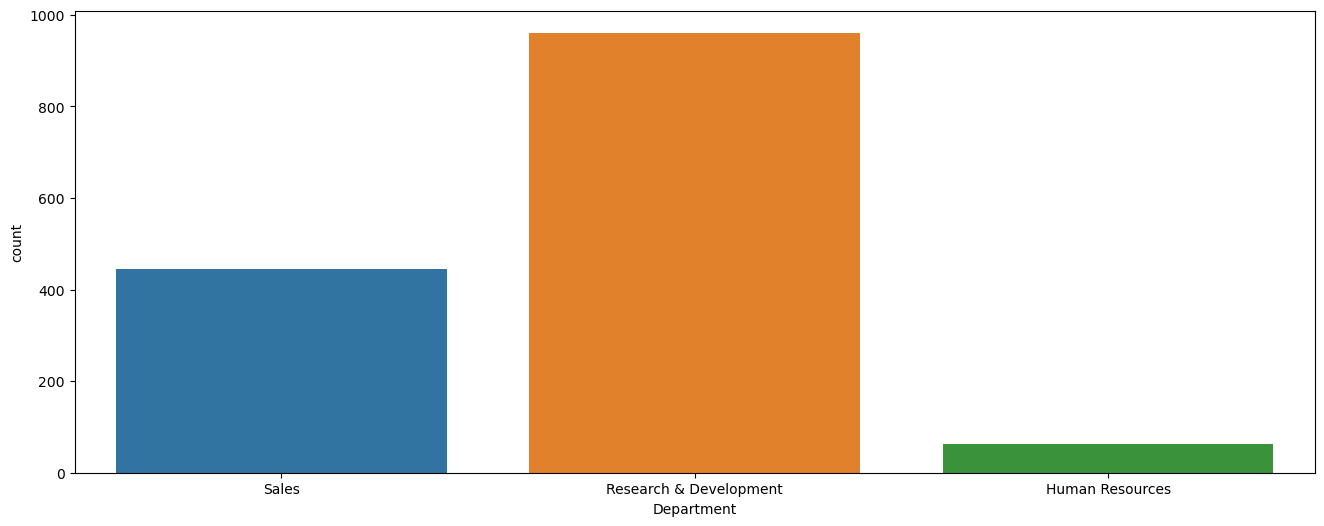

In [43]:
#Plotting counts for department
print(df['Department'].value_counts())
plt.figure(figsize = (16,6))
sns.countplot(df['Department'])
plt.show()

In [44]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
df.loc[df['Department'] == 'Sales', 'ord_Department'] = 1
df.loc[df['Department'] == 'Research & Development', 'ord_Department'] = 2
df.loc[df['Department'] == 'Human Resources', 'ord_Department'] = 3


In [45]:
#HR
departmentgrp = df.groupby(by = 'Department')

df2 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df2 = pd.DataFrame(df2)
df2 = df1.reset_index()
df2['Department'] = 'HR'
df2

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears
0,0,41,Yes,Travel_Rarely,1102,HR,1,2,Life Sciences,2,...,1,0,0,1,6,4,0,5,2,8
1,1,49,No,Travel_Frequently,279,HR,8,1,Life Sciences,3,...,4,1,3,3,10,7,1,7,2,10
2,2,37,Yes,Travel_Rarely,1373,HR,2,2,Other,4,...,2,0,3,3,0,0,0,0,1,7
3,3,33,No,Travel_Frequently,1392,HR,3,4,Life Sciences,4,...,3,0,3,3,8,7,3,0,1,8
4,4,27,No,Travel_Rarely,591,HR,2,1,Medical,1,...,4,1,3,3,2,2,2,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,HR,23,2,Medical,3,...,3,1,3,3,5,2,0,3,2,17
1466,1466,39,No,Travel_Rarely,613,HR,6,1,Medical,4,...,1,1,5,3,7,7,1,7,3,9
1467,1467,27,No,Travel_Rarely,155,HR,4,3,Life Sciences,2,...,2,1,0,3,6,2,0,3,2,6
1468,1468,49,No,Travel_Frequently,1023,HR,2,3,Medical,4,...,4,0,3,2,9,6,0,8,2,17


In [46]:
# #R&D
# df3 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
# df3 = df2.to_frame().reset_index()
# df3['Department'] = 'R&D'
# #df2.loc[df2['Department'] != 'HR', 'Department'] = 'R&D' 
# df4 = df3.append(df3, ignore_index=True)
# df4

In [47]:
# df3 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
# df3 = df3.to_frame().reset_index()
# d33['Department'] = 'Sales'
# df5 = df4.append(df3, ignore_index=True)
# df5

In [48]:
# #Calculating % of frequent travel employees in Sales and R&D
# print("% of frequent travel in Sales is::",(df5.loc[((df5['Department'] == 'Sales') & (df5['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
# print("% of frequent travel in R&D is ::",(df5.loc[((df5['Department'] == 'R&D') & (df5['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))


In [49]:
# #plotting department data against travel
# plt.figure(figsize = (16,6))
# sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df5, hue = 'index')
# plt.show()

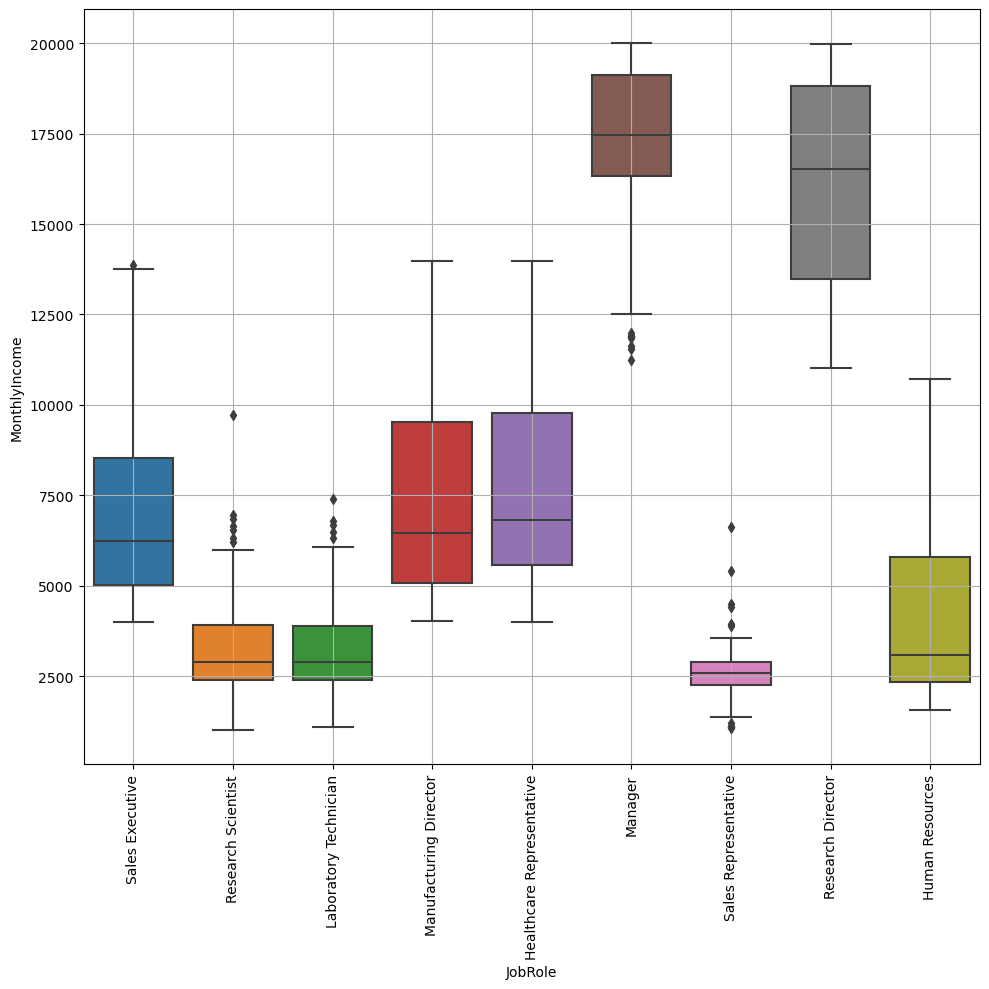

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

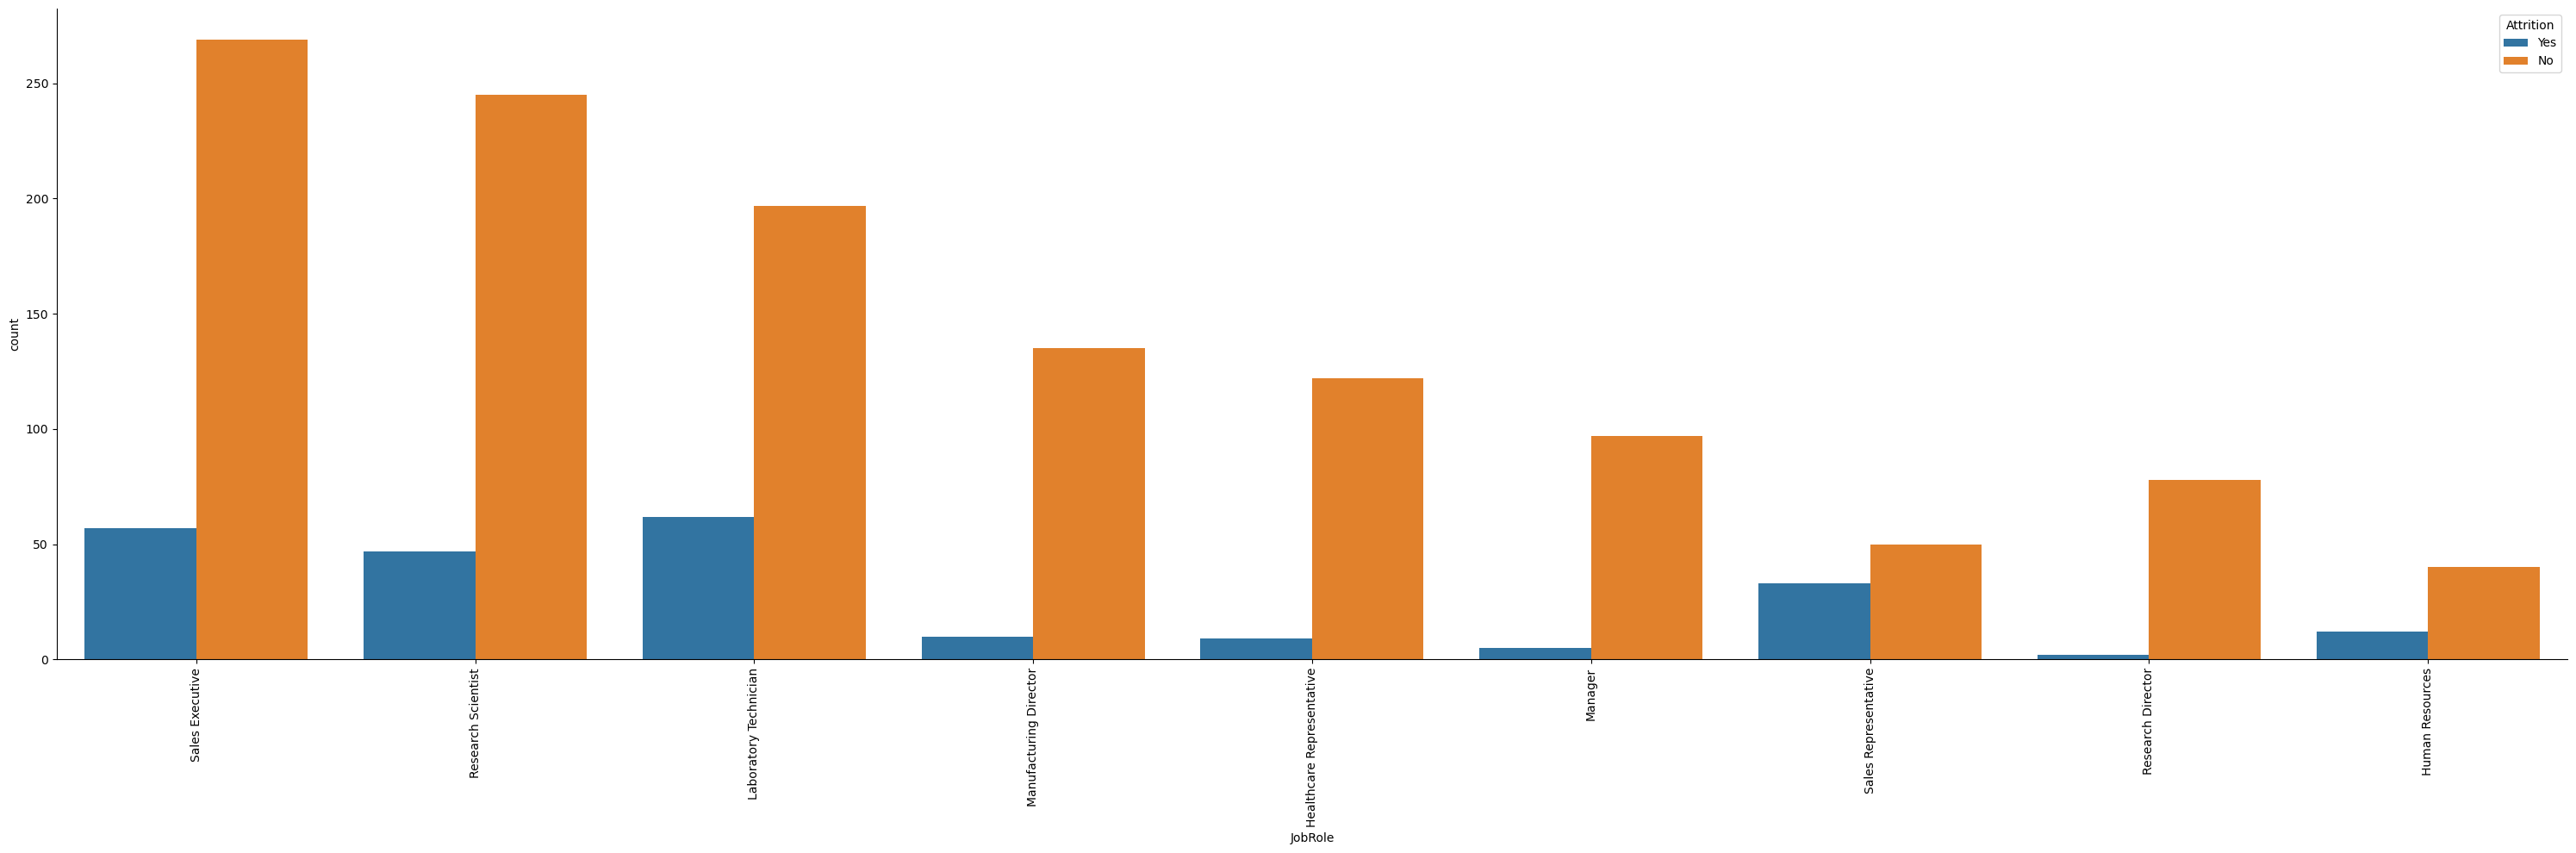

In [51]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
sns.catplot(x='JobRole', hue ='Attrition', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Department', ylabel='count'>

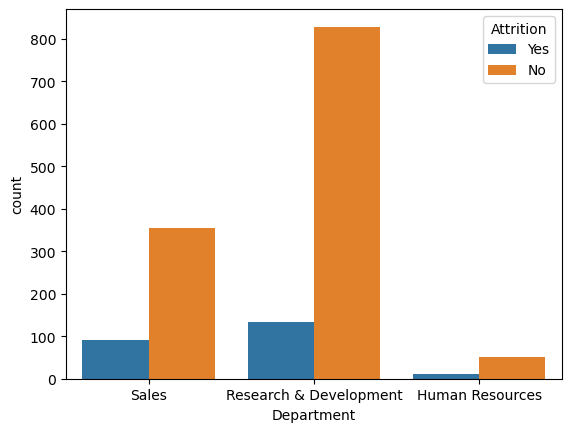

In [52]:

sns.countplot(x='Department', hue='Attrition', data=df)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

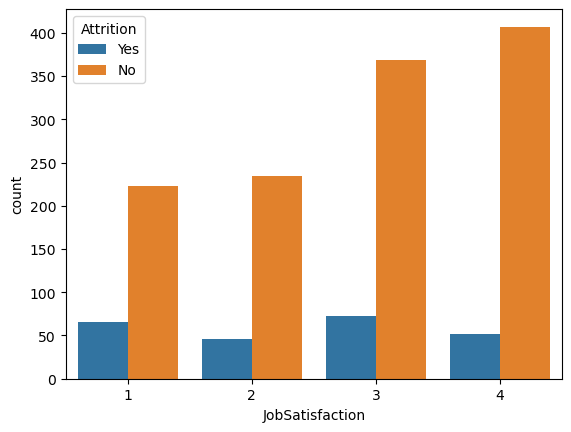

In [53]:

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

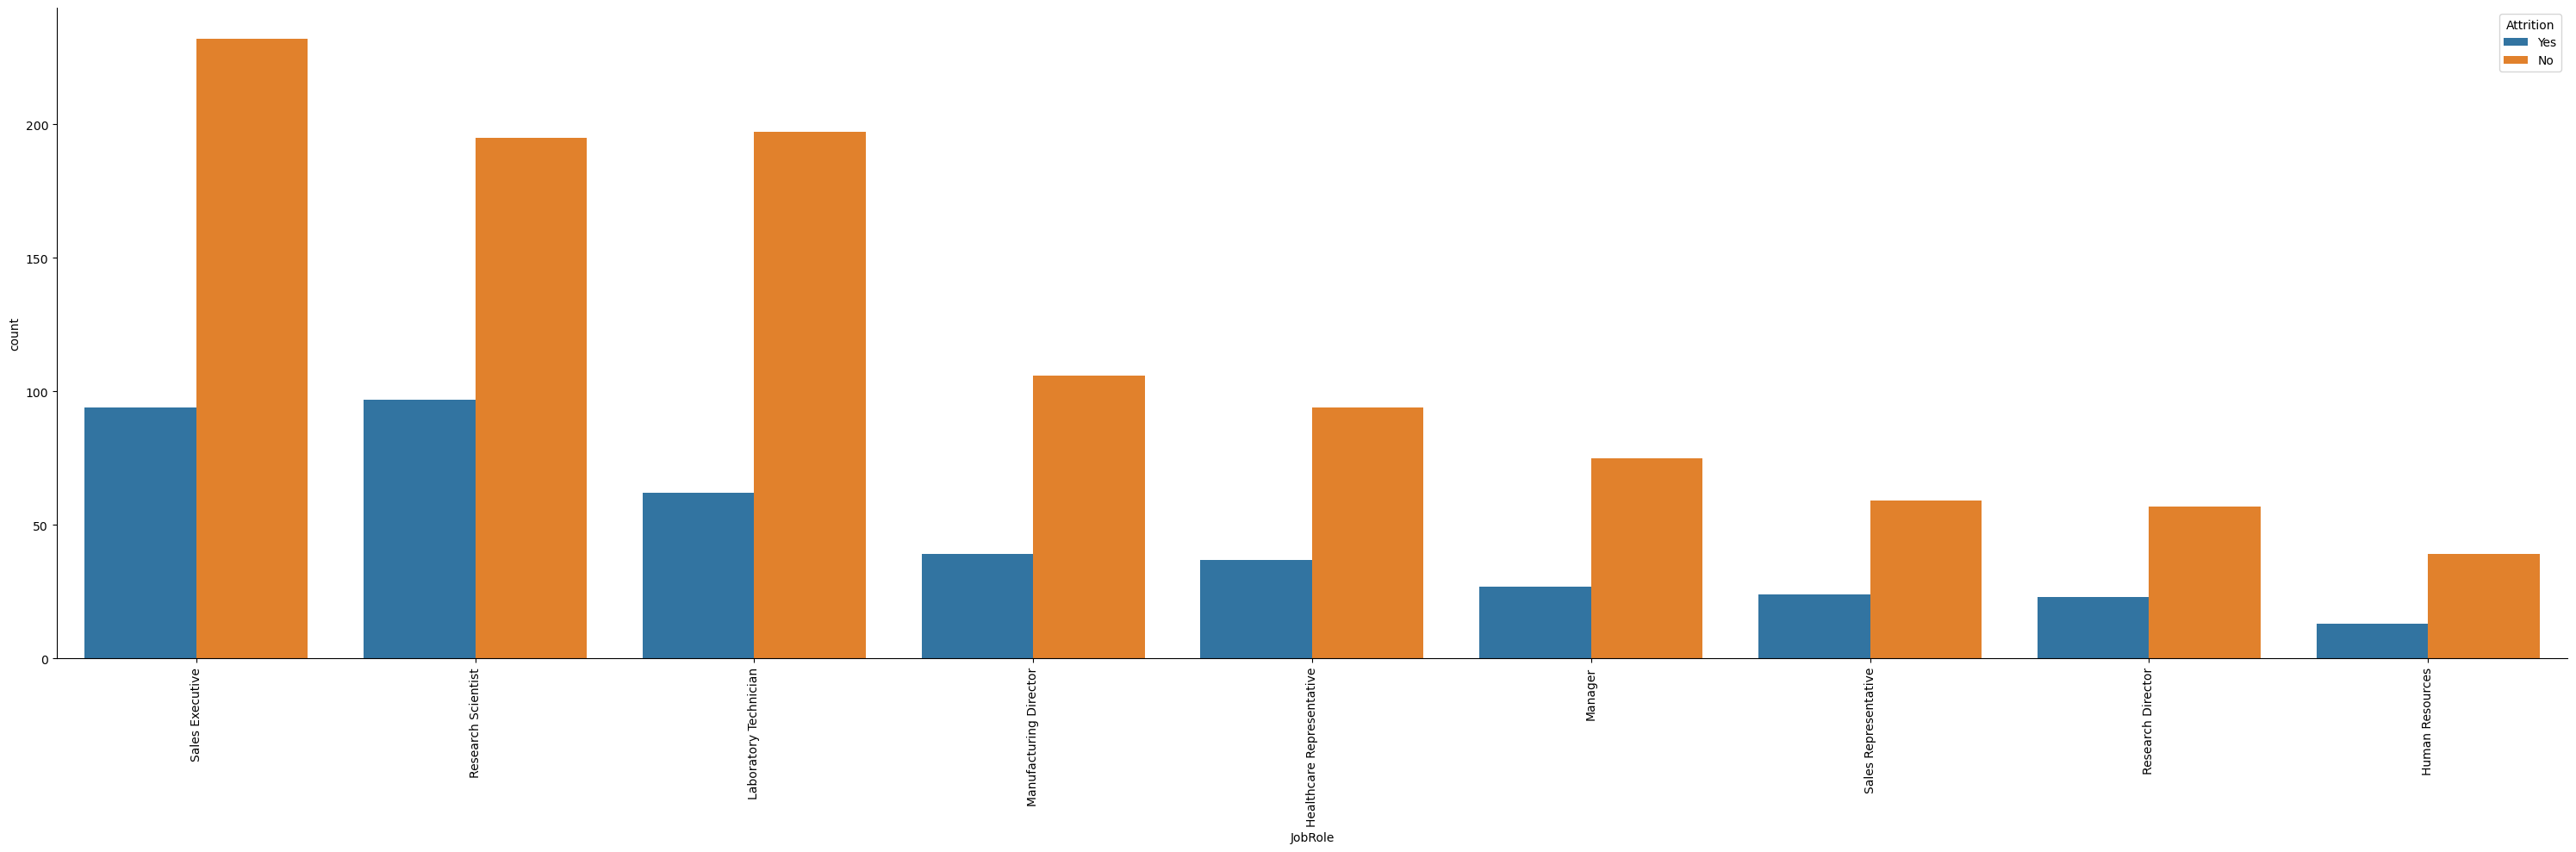

In [54]:
sns.catplot(x='JobRole', hue ='OverTime', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

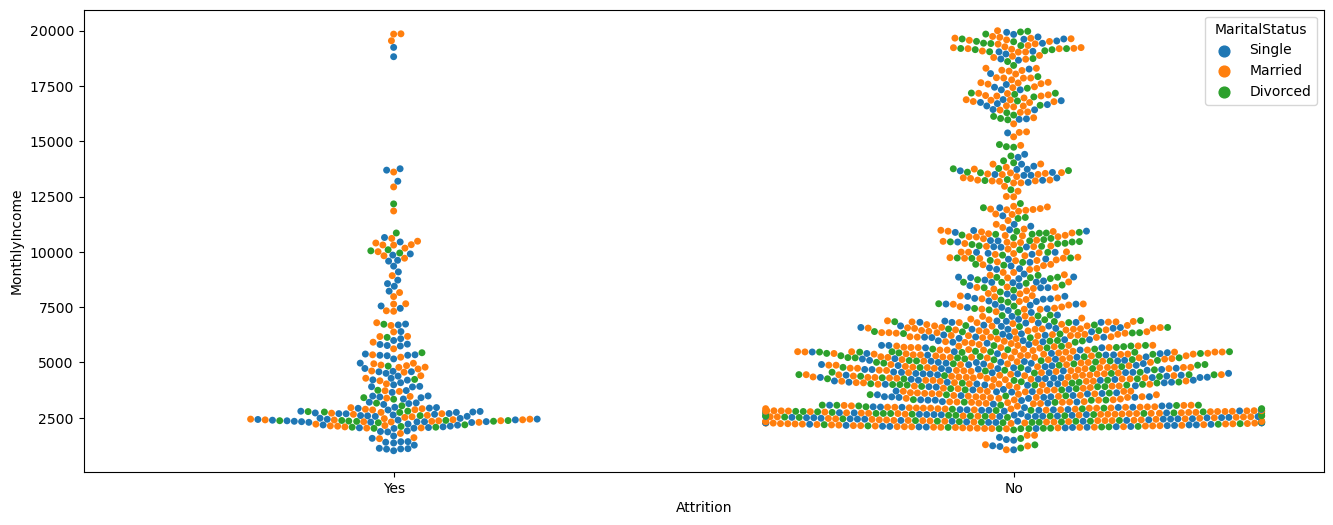

'Attrition is highest amount employees who are earning between (2500-5000)'

In [55]:
#Plotting Attrition vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = df, hue= 'MaritalStatus')
plt.show()

#Insight 6
"""Attrition is highest amount employees who are earning between (2500-5000)"""


C:\Users\swara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\swara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


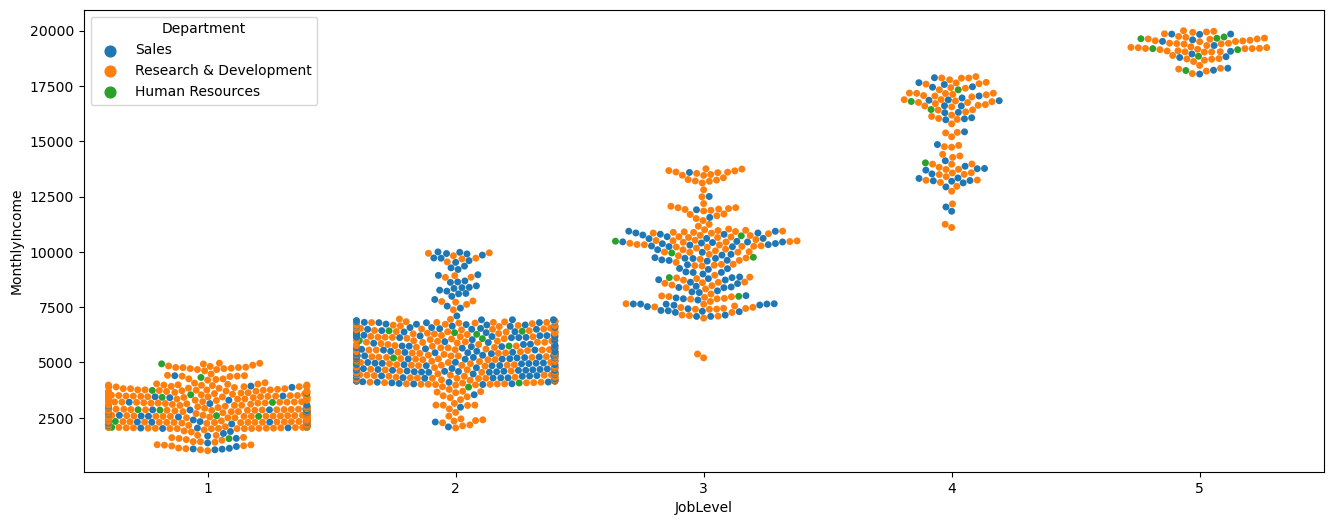

In [56]:
#Plotting Joblevel vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = df, hue= 'Department')
plt.show()

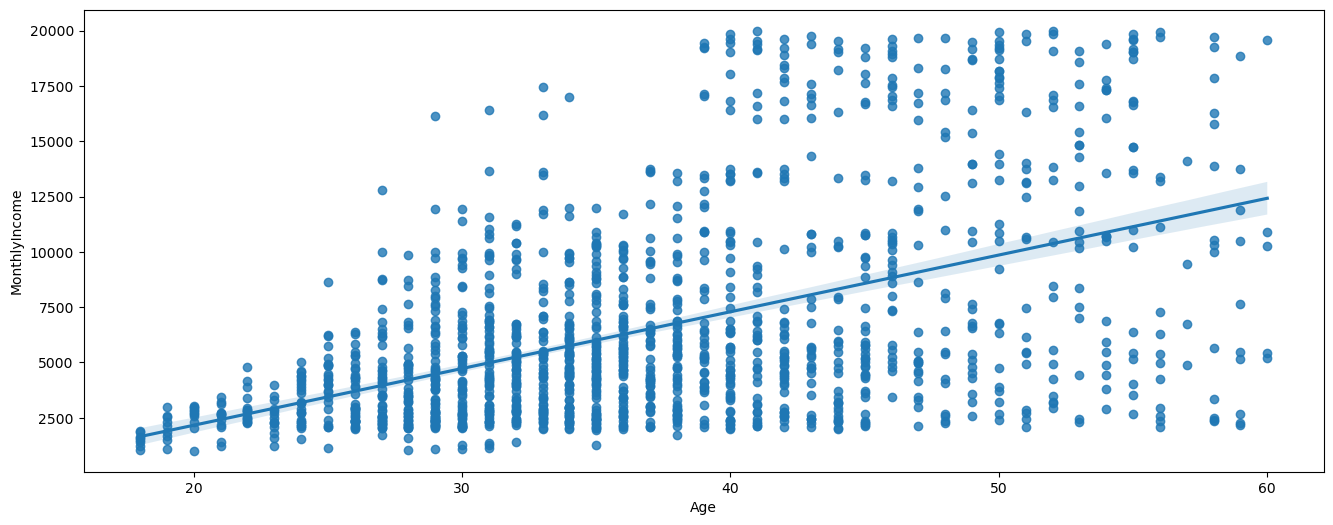

'There is a linear relation between Age and Monthly income'

In [57]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = df)
plt.show()

#Insight 7
"""There is a linear relation between Age and Monthly income"""

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears,cat_BusinessTravel,ord_Department
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,2,8,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,2,10,2.0,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,1,7,1.0,2.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,1,8,2.0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,1,6,1.0,2.0


In [59]:
#Analyzing salary hike
df['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

C:\Users\swara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


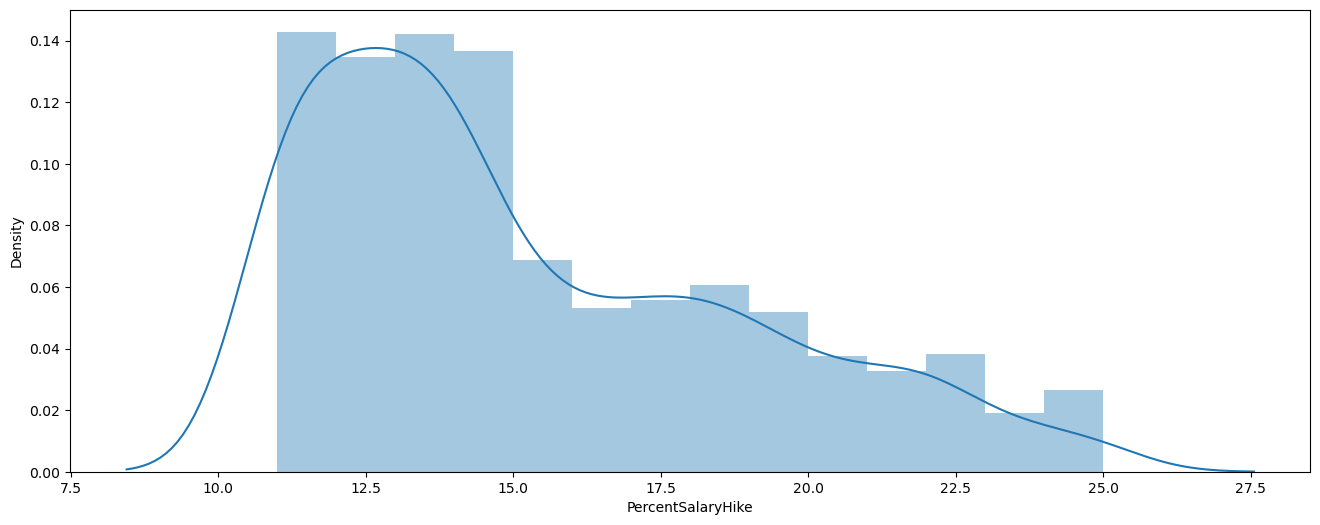

'The salary hike histogram is skewed to the right'

In [60]:
#Plotting histogram of Hike%
plt.figure(figsize = (16,6))
sns.distplot(df['PercentSalaryHike'], kde = True)
plt.show()

#Insight 8
"""The salary hike histogram is skewed to the right""" 

C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


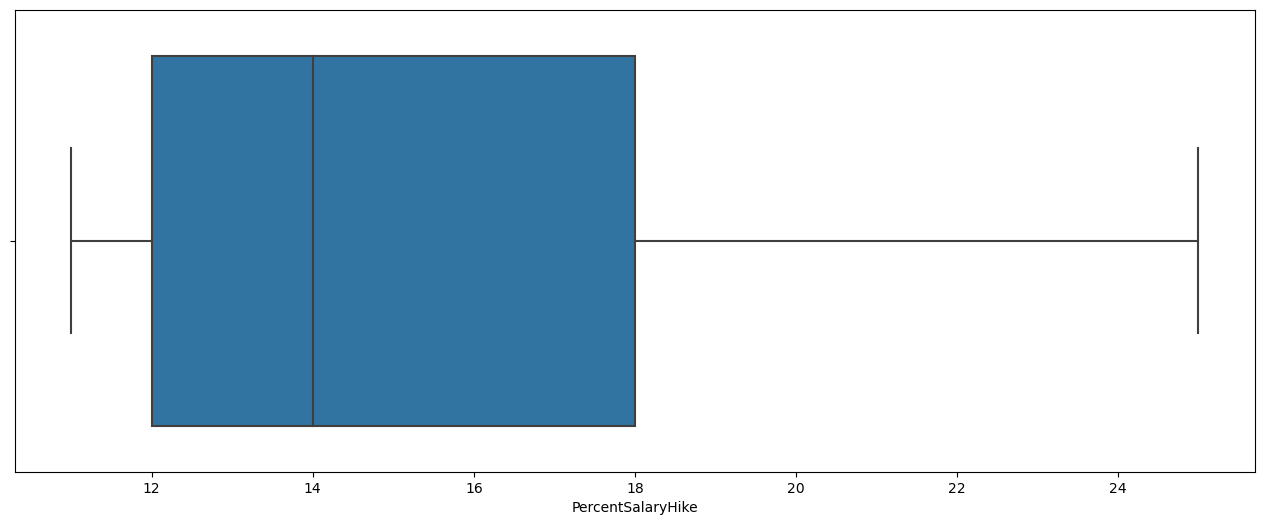

'The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%'

In [61]:
#Plotting box plot for salary hike
plt.figure(figsize = (16,6))
sns.boxplot('PercentSalaryHike', data = df)
plt.show()

#Insight 8
"""The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%""" 

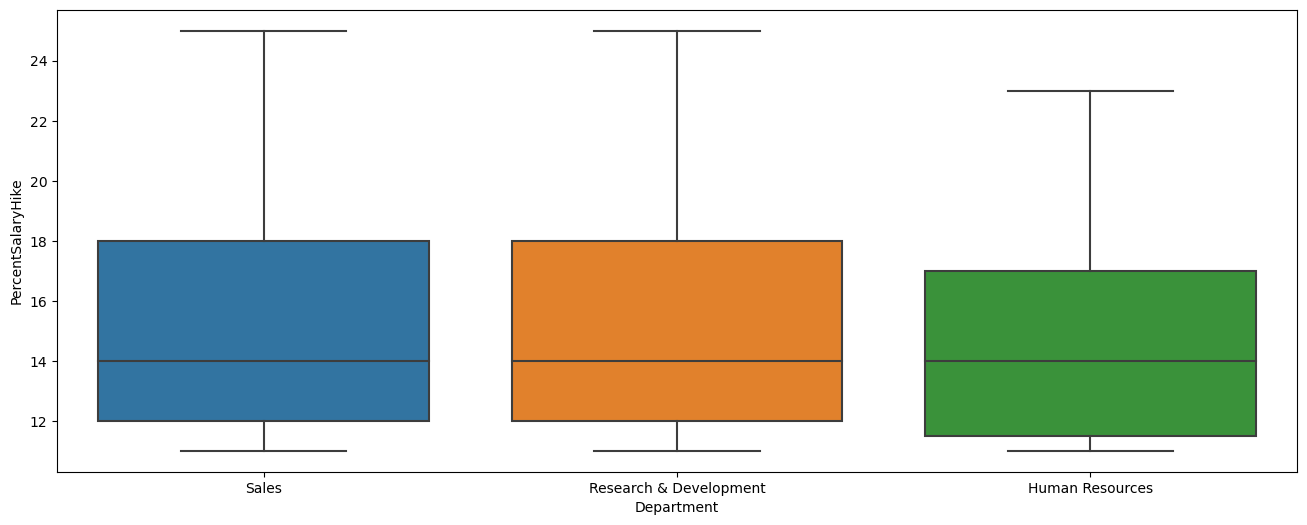

In [62]:
#Plotting hike% for each department
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = df)
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [63]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [64]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [65]:
def labelencoder(df):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df["Attrition"] = le.fit_transform(temp_df["Attrition"])
    temp_df["BusinessTravel"] = le.fit_transform(temp_df["BusinessTravel"])
    temp_df["Department"] = le.fit_transform(temp_df["Department"])
    temp_df["EducationField"] = le.fit_transform(temp_df["EducationField"])
    temp_df["Gender"] = le.fit_transform(temp_df["Gender"])
    temp_df["JobRole"] = le.fit_transform(temp_df["JobRole"])
    temp_df["MaritalStatus"] = le.fit_transform(temp_df["MaritalStatus"])
    temp_df["OverTime"] = le.fit_transform(temp_df["OverTime"])
    return temp_df

encoded_cap_data = labelencoder(df)

Feature Selection:

We select and deselect certain features which do not significantly contribute to our model. The variables are deselected based on the following:

Invariability in the Data point
Independence between Target variable and Independent variable
Multicollinearity

In [66]:
corr = df.corr()

In [67]:
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears,cat_BusinessTravel,ord_Department
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.509604,0.680381,-0.024751,0.031882
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.169105,-0.171063,-0.000074,-0.063991
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.019311,0.034226,-1.000000,0.009044
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.002966,0.014515,0.004086,-0.007109
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.101963,-0.015762,0.009044,-1.000000
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.005303,0.004628,0.024469,-0.017225
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.101589,0.148280,-0.000757,-0.007996
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,-0.044933,-0.027848,-0.023724,-0.013720
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.001212,-0.002693,-0.004174,0.019395
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,-0.039403,-0.046881,0.032981,0.041583


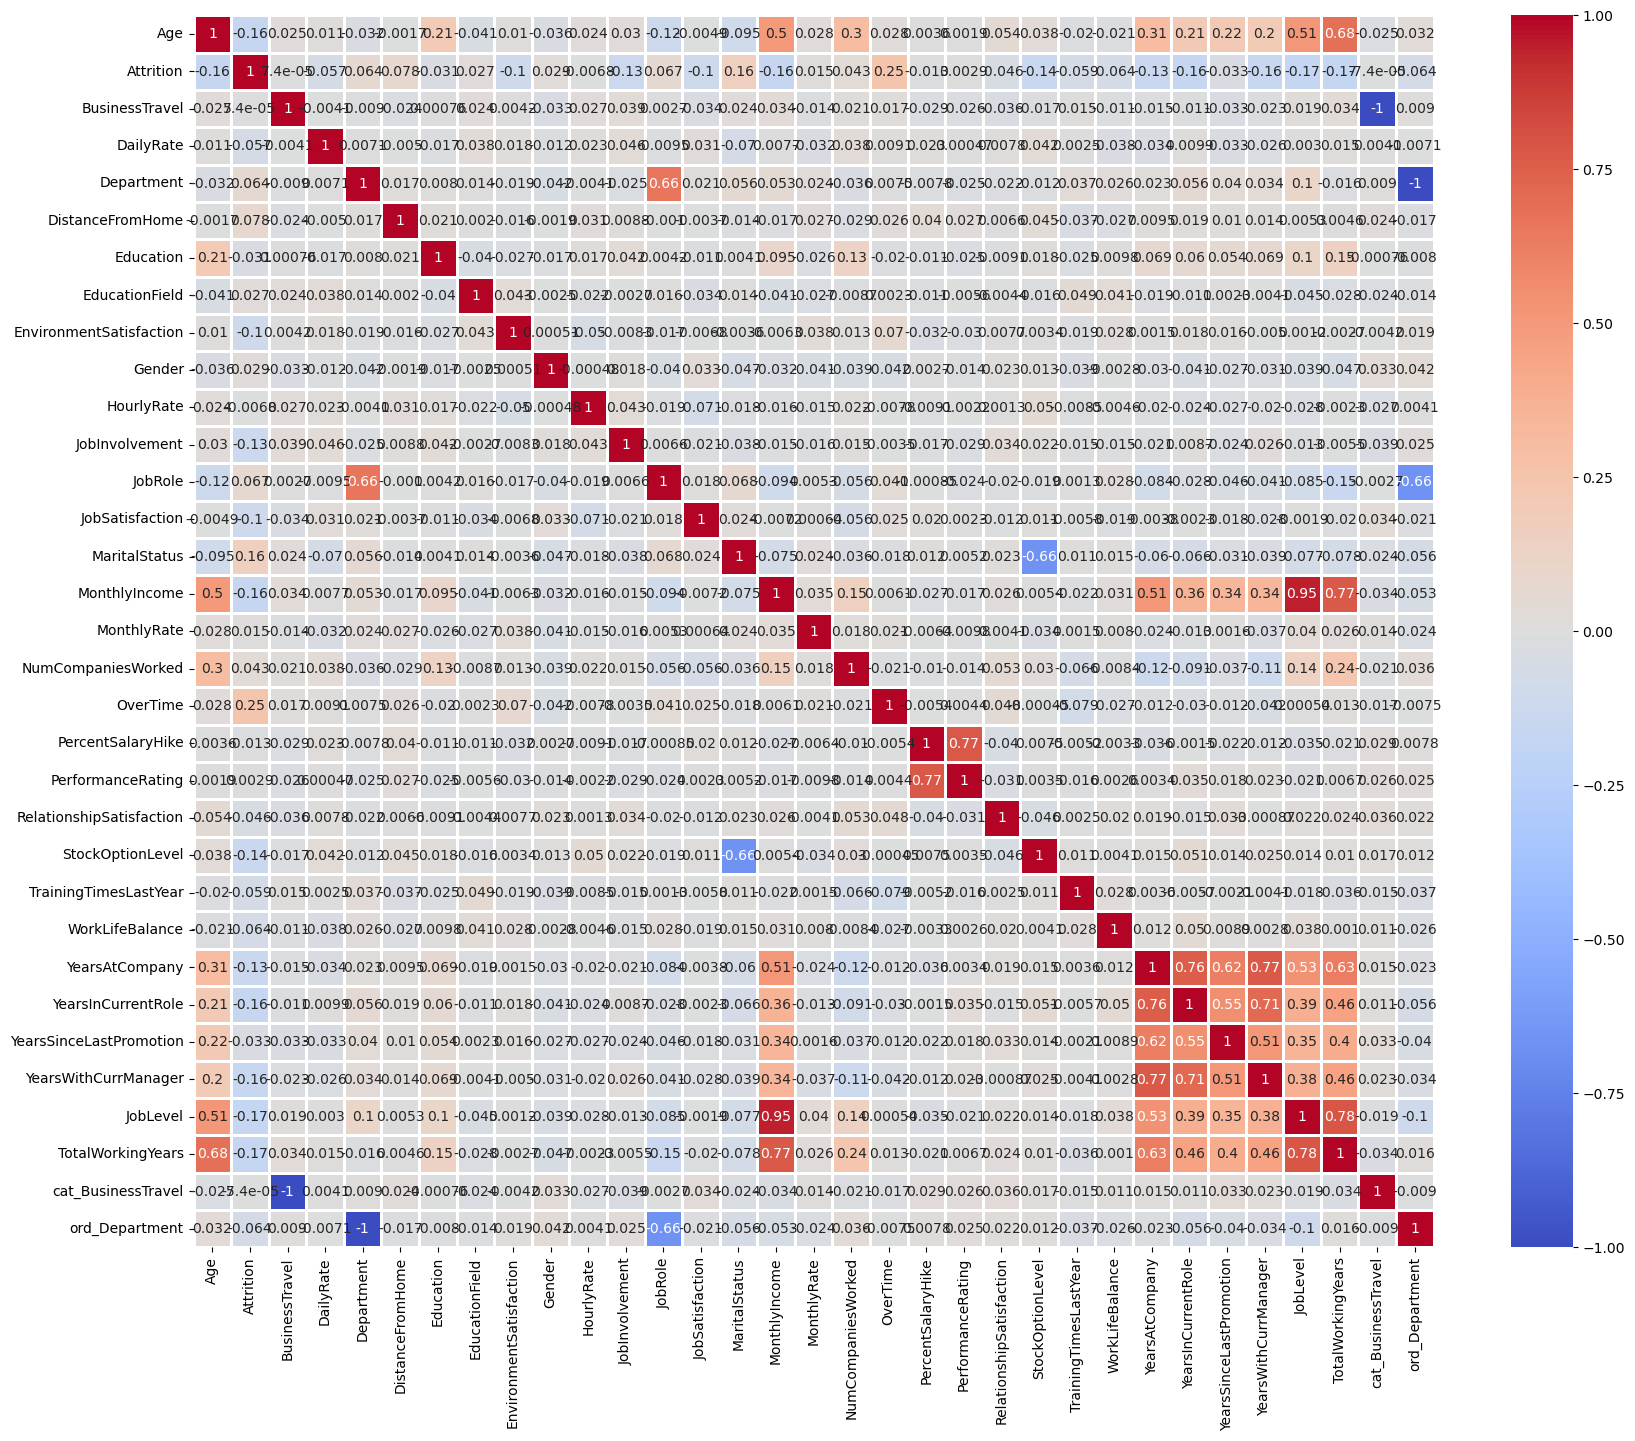

In [68]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(20,16))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [69]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

JobRole - Department : 0.6624311978258447
MonthlyIncome - Age : 0.4978545669265801
PerformanceRating - PercentSalaryHike : 0.7735499964012664
StockOptionLevel - MaritalStatus : -0.6625772916604346
YearsAtCompany - MonthlyIncome : 0.5142848257331957
YearsInCurrentRole - YearsAtCompany : 0.7587537366134619
YearsSinceLastPromotion - YearsAtCompany : 0.6184088652176047
YearsSinceLastPromotion - YearsInCurrentRole : 0.5480562476995187
YearsWithCurrManager - YearsAtCompany : 0.7692124251007031
YearsWithCurrManager - YearsInCurrentRole : 0.7143647616385931
YearsWithCurrManager - YearsSinceLastPromotion : 0.5102236357788085
JobLevel - Age : 0.5096042284323842
JobLevel - MonthlyIncome : 0.9502999134798472
JobLevel - YearsAtCompany : 0.5347386873756309
TotalWorkingYears - Age : 0.6803805357911985
TotalWorkingYears - MonthlyIncome : 0.7728932462543574
TotalWorkingYears - YearsAtCompany : 0.6281331552682468
TotalWorkingYears - YearsInCurrentRole : 0.46036463801181005
TotalWorkingYears - YearsSince

By seeing the correlation matrix we can infer that 'Attrition (Target Feature) has -ve correlation with 'Age, JobInvolvement, JobLevel, MontlyIncome, JobSatisfaction, etc., +ve corelation with OverTime, DistanceFromHome, NumberofCompaniesWorked etc

Looking at the corelationmatrix we can say that..
JobLevel: 0.95 correlation coefficient with MonthlyIncome and 0.78 with TotalWorkingYears.
TotalWorkingYears: 0.77 correlation with MonthlyIncome.

In [70]:
# # calculate correlation coefficients
# correlations = df.corr()['Attrition'].drop('Attrition')

# # print correlation coefficients in descending order
# print(correlations.sort_values(ascending=False))

In [71]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,TotalWorkingYears,cat_BusinessTravel,ord_Department
0,41,1,2,1102,2,1,2,1,2,0,...,0,1,6,4,0,5,2,8,1.0,1.0
1,49,0,1,279,1,8,1,1,3,1,...,3,3,10,7,1,7,2,10,2.0,2.0
2,37,1,2,1373,1,2,2,4,4,1,...,3,3,0,0,0,0,1,7,1.0,2.0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,8,7,3,0,1,8,2.0,2.0
4,27,0,2,591,1,2,1,3,1,1,...,3,3,2,2,2,2,1,6,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,5,2,0,3,2,17,2.0,2.0
1466,39,0,2,613,1,6,1,3,4,1,...,5,3,7,7,1,7,3,9,1.0,2.0
1467,27,0,2,155,1,4,3,1,2,1,...,0,3,6,2,0,3,2,6,1.0,2.0
1468,49,0,1,1023,2,2,3,3,4,1,...,3,2,9,6,0,8,2,17,2.0,1.0


In [72]:
#Segregating the Independent and the dependant variable
y = encoded_cap_data["Attrition"].values
X = encoded_cap_data.drop(["Attrition"],axis =1)

In [73]:
#important features for predicting Attrition
from sklearn.ensemble import ExtraTreesClassifier
# Tree-based feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
k = 35
# get the feature importances and indices of top k features
importances = pd.Series(model.feature_importances_, index=X.columns)
indices = importances.sort_values(ascending=False)[:k].index

# select the top k features from the original DataFrame
X_selected = df[indices]
# save the x_selected DataFrame to a CSV file
X_selected.to_csv('top_features.csv', index=False)

In [74]:
X_selected

,OverTime,Age,MonthlyIncome,TotalWorkingYears,JobSatisfaction,YearsAtCompany,EnvironmentSatisfaction,WorkLifeBalance,JobLevel,RelationshipSatisfaction,...,MonthlyRate,TrainingTimesLastYear,EducationField,Education,Gender,cat_BusinessTravel,ord_Department,BusinessTravel,Department,PerformanceRating
0,1,41,5993,8,4,6,2,1,2,1,...,19479,0,1,2,0,1.0,1.0,2,2,3
1,0,49,5130,10,2,10,3,3,2,4,...,24907,3,1,1,1,2.0,2.0,1,1,4
2,1,37,2090,7,3,0,4,3,1,2,...,2396,3,4,2,1,1.0,2.0,2,1,3
3,1,33,2909,8,3,8,4,3,1,3,...,23159,3,1,4,0,2.0,2.0,1,1,3
4,0,27,3468,6,2,2,1,3,1,4,...,16632,3,3,1,1,1.0,2.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,2571,17,4,5,3,3,2,3,...,12290,3,3,2,1,2.0,2.0,1,1,3
1466,0,39,9991,9,1,7,4,3,3,1,...,21457,5,3,1,1,1.0,2.0,2,1,3
1467,1,27,6142,6,2,6,2,3,2,2,...,5174,0,1,3,1,1.0,2.0,2,1,4
1468,0,49,5390,17,2,9,4,2,2,4,...,13243,3,3,3,1,2.0,1.0,1,2,3


C:\Users\swara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


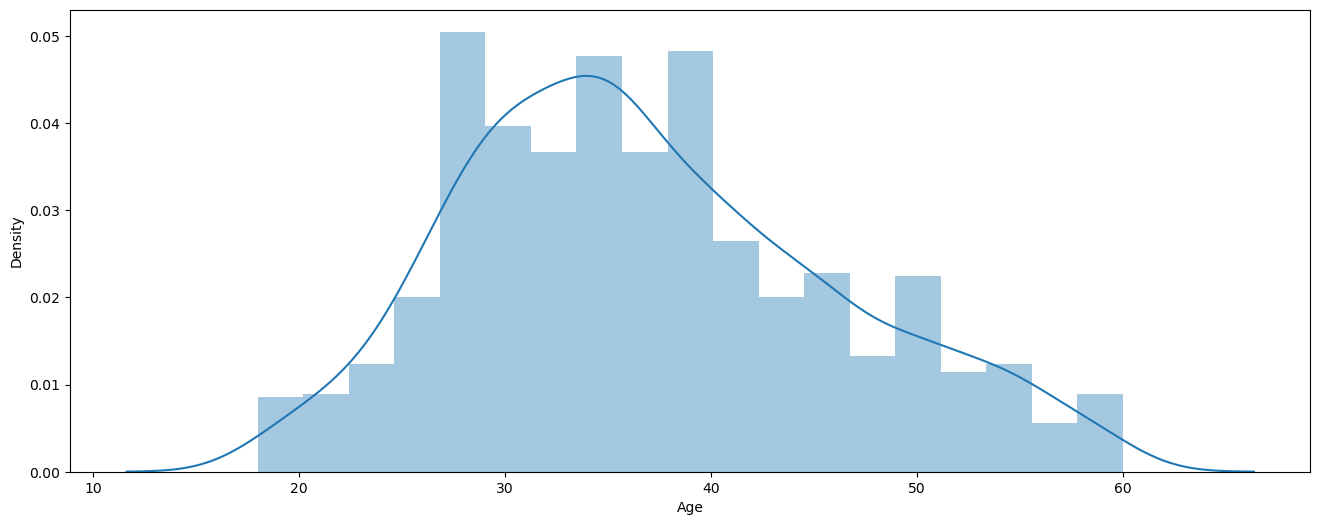

In [75]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(df['Age'])
plt.show()

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
print(X_train.shape, type(X_train))

(1176, 32) <class 'pandas.core.frame.DataFrame'>


In [78]:
print(y_train.shape, type(y_train))

(1176,) <class 'numpy.ndarray'>


In [79]:
print(X_test.shape, type(X_test))

(294, 32) <class 'pandas.core.frame.DataFrame'>


In [80]:
print(y_test.shape, type(y_test))

(294,) <class 'numpy.ndarray'>


# Feature Sclaing/Standerdization

In [81]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
print(X_train, X_train.shape, type(X_train))

[[-1.38855944  0.58928051 -1.10813858 ... -1.1673683  -0.58928051
   0.50017392]
 [-2.04073779 -2.46355596 -1.2634814  ... -1.42339685  2.46355596
   0.50017392]
 [-0.84507748  0.58928051  1.10364737 ... -0.14325407 -0.58928051
  -1.39115896]
 ...
 [-1.60595222 -0.93713773  1.1258392  ... -1.29538258  0.93713773
   0.50017392]
 [-0.84507748  0.58928051  1.42666182 ... -0.14325407 -0.58928051
   0.50017392]
 [ 1.43754676  0.58928051 -1.32019386 ...  2.03298865 -0.58928051
  -1.39115896]] (1176, 32) <class 'numpy.ndarray'>


In [83]:
print(y_train.shape, type(y_train))

(1176,) <class 'numpy.ndarray'>


In [84]:
print(X_test,X_test.shape, type(X_test))

[[-0.95377387  0.58928051  0.16419314 ... -0.65531119 -0.58928051
  -1.39115896]
 [ 1.76363593  0.58928051  0.70172863 ... -0.78332546 -0.58928051
   0.50017392]
 [-1.38855944  0.58928051 -1.37937208 ... -1.29538258 -0.58928051
   2.39150679]
 ...
 [ 1.43754676  0.58928051  1.28857931 ...  1.7769601  -0.58928051
   0.50017392]
 [ 0.02449366  0.58928051  1.04940067 ... -0.91133974 -0.58928051
   0.50017392]
 [ 1.11145758  0.58928051 -1.35718025 ... -0.39928263 -0.58928051
  -1.39115896]] (294, 32) <class 'numpy.ndarray'>


In [85]:
print(y_test.shape, type(y_test))

(294,) <class 'numpy.ndarray'>


Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


In [86]:
#Build the decision tree model with tree size 50
model_HR = RandomForestClassifier(n_estimators = 100, random_state = 42)
model_HR.fit(X_train, y_train)
model_HR_score_train = model_HR.score(X_train, y_train)
print("Training score: ",model_HR_score_train)
model_HR_score_test = model_HR.score(X_test, y_test)
print("Testing score: ",model_HR_score_test)


Training score:  1.0
Testing score:  0.8809523809523809


In [87]:
#caluclating the probabilities for the AUC curve
#Decision treemodel_dt_2
y_pred_prob = model_HR.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.13, 0.09, 0.42, 0.05, 0.04, 0.45, 0.18, 0.09, 0.18, 0.28, 0.37,
       0.23, 0.04, 0.26, 0.06, 0.15, 0.28, 0.19, 0.14, 0.04, 0.19, 0.03,
       0.07, 0.25, 0.09, 0.23, 0.29, 0.11, 0.12, 0.02, 0.08, 0.05, 0.  ,
       0.06, 0.21, 0.02, 0.03, 0.27, 0.35, 0.06, 0.14, 0.13, 0.04, 0.06,
       0.65, 0.06, 0.5 , 0.32, 0.07, 0.71, 0.13, 0.15, 0.17, 0.21, 0.07,
       0.11, 0.22, 0.06, 0.04, 0.15, 0.05, 0.63, 0.1 , 0.02, 0.33, 0.22,
       0.02, 0.02, 0.1 , 0.13, 0.05, 0.12, 0.21, 0.09, 0.13, 0.09, 0.02,
       0.05, 0.05, 0.3 , 0.02, 0.06, 0.09, 0.28, 0.1 , 0.12, 0.41, 0.14,
       0.06, 0.02, 0.  , 0.3 , 0.23, 0.34, 0.09, 0.07, 0.01, 0.1 , 0.2 ,
       0.13, 0.31, 0.02, 0.08, 0.32, 0.03, 0.07, 0.09, 0.38, 0.14, 0.05,
       0.34, 0.16, 0.16, 0.05, 0.42, 0.22, 0.33, 0.14, 0.05, 0.11, 0.24,
       0.07, 0.18, 0.06, 0.25, 0.52, 0.08, 0.08, 0.06, 0.04, 0.06, 0.48,
       0.38, 0.09, 0.04, 0.05, 0.22, 0.38, 0.38, 0.01, 0.45, 0.08, 0.04,
       0.08, 0.03, 0.15, 0.11, 0.29, 0.27, 0.33, 0.

In [88]:
#Predicting the Attrition for X_test
y_pred = model_HR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
# Model Accuracy:
print ("Model Accuracy is::", (model_HR.score(X_test, y_test))*100)
# Recall
print("Model recall is::", (recall_score(y_test, y_pred))*100)

Model Accuracy is:: 88.09523809523809
Model recall is:: 10.256410256410255
